# Intro to using `naturf` 

In [1]:
import geopandas as gpd

from naturf.config import Settings
import naturf.nodes as nodes

In [2]:
# Load in shapefile, standardize the column names, and filter out any buildings with zero height
path = "example/shapefile/C-5.shp"
gdf = gpd.read_file(path)
gdf = nodes.standardize_column_names_df(gdf)
gdf = nodes.filter_zero_height_df(gdf)
gdf = nodes.apply_max_building_height(gdf)

In [3]:
# Pull out necessary columns and begin calculate values necessary for parameter calculations
building_geometry = gdf[Settings.geometry_field]
building_id = gdf[Settings.id_field]
building_height = gdf[Settings.height_field]
target_crs = nodes.target_crs(gdf)
building_area = nodes.building_area(building_geometry)
total_plan_area_geometry = nodes.total_plan_area_geometry(building_geometry)
total_plan_area = nodes.total_plan_area(total_plan_area_geometry)

In [4]:
wall_angle_direction_length = nodes.wall_angle_direction_length(building_geometry)
wall_length = nodes.wall_length(wall_angle_direction_length)
# Perform a spatial join using buffer distance and style set in the config file to determine what buildings fall within each
# buildings total plan area
buildings_intersecting_plan_area = nodes.buildings_intersecting_plan_area(building_id,
                                                                          building_height,
                                                                          building_geometry,
                                                                          building_area,
                                                                          total_plan_area_geometry,
                                                                          wall_length,
                                                                          target_crs)

In [5]:
# Begin calculating parameters
building_plan_area = nodes.building_plan_area(buildings_intersecting_plan_area)
frontal_length = nodes.frontal_length(buildings_intersecting_plan_area)
frontal_area_density = nodes.frontal_area_density(frontal_length, building_height, total_plan_area)

In [6]:
plan_area_density = nodes.plan_area_density(building_plan_area, building_height, total_plan_area)
rooftop_area_density = nodes.rooftop_area_density(plan_area_density)
plan_area_fraction = nodes.plan_area_fraction(building_plan_area, total_plan_area)

In [7]:
mean_building_height = nodes.mean_building_height(buildings_intersecting_plan_area)
standard_deviation_of_building_heights = nodes.standard_deviation_of_building_heights(buildings_intersecting_plan_area)
area_weighted_mean_of_building_heights = nodes.area_weighted_mean_of_building_heights(buildings_intersecting_plan_area)
building_surface_area = nodes.building_surface_area(wall_length, building_height, building_area)

In [8]:
lot_area = nodes.lot_area(buildings_intersecting_plan_area, building_surface_area)
frontal_area = nodes.frontal_area(frontal_length, building_height)

In [9]:
building_surface_area_to_plan_area_ratio = nodes.building_surface_area_to_plan_area_ratio(building_surface_area, total_plan_area)
frontal_area_index = nodes.frontal_area_index(frontal_area, total_plan_area)
complete_aspect_ratio = nodes.complete_aspect_ratio(building_surface_area, total_plan_area, building_plan_area)

In [10]:
distance_between_buildings = nodes.distance_between_buildings(buildings_intersecting_plan_area)
average_distance_between_buildings = nodes.average_distance_between_buildings(distance_between_buildings)
height_to_width_ratio = nodes.height_to_width_ratio(mean_building_height, average_distance_between_buildings)
sky_view_factor = nodes.sky_view_factor(building_height, average_distance_between_buildings)

In [11]:
grimmond_oke_roughness_length = nodes.grimmond_oke_roughness_length(building_height)
grimmond_oke_displacement_height = nodes.grimmond_oke_displacement_height(building_height)
raupach_displacement_height = nodes.raupach_displacement_height(building_height, frontal_area_index)
raupach_roughness_length = nodes.raupach_roughness_length(building_height, frontal_area_index, raupach_displacement_height)
macdonald_displacement_height = nodes.macdonald_displacement_height(building_height, plan_area_fraction)
macdonald_roughness_length = nodes.macdonald_roughness_length(building_height, macdonald_displacement_height, frontal_area, lot_area)
vertical_distribution_of_building_heights = nodes.vertical_distribution_of_building_heights(building_height)

In [12]:
raupach_displacement_height

,raupach_displacement_height_north,raupach_displacement_height_east,raupach_displacement_height_south,raupach_displacement_height_west
0,0.212556,0.210756,0.215884,0.210707
1,0.228000,0.226077,0.231553,0.226025
2,10.658445,10.117350,10.408661,9.658848
3,4.145567,4.134151,4.228290,4.232183
4,5.155915,4.968264,5.172117,4.853836
...,...,...,...,...
187,1.872377,1.551215,1.872176,1.551203
188,0.212719,0.251011,0.211143,0.251006
189,5.717203,5.120082,5.710287,5.122209
190,9.274510,10.429185,9.358159,10.231708


In [13]:
# Merge all calculated parameters into one GeoDataFrame
merge_parameters = nodes.merge_parameters(
    frontal_area_density,
    plan_area_density,
    rooftop_area_density,
    plan_area_fraction,
    mean_building_height,
    standard_deviation_of_building_heights,
    area_weighted_mean_of_building_heights,
    building_surface_area_to_plan_area_ratio,
    frontal_area_index,
    complete_aspect_ratio,
    height_to_width_ratio,
    sky_view_factor,
    grimmond_oke_roughness_length,
    grimmond_oke_displacement_height,
    raupach_roughness_length,
    raupach_displacement_height,
    macdonald_roughness_length,
    macdonald_displacement_height,
    vertical_distribution_of_building_heights,
    building_geometry,
    target_crs,)

In [14]:
merge_parameters

,frontal_area_north_0,frontal_area_north_1,frontal_area_north_2,frontal_area_north_3,frontal_area_north_4,frontal_area_north_5,frontal_area_north_6,frontal_area_north_7,frontal_area_north_8,frontal_area_north_9,...,vertical_distribution_of_building_heights_6,vertical_distribution_of_building_heights_7,vertical_distribution_of_building_heights_8,vertical_distribution_of_building_heights_9,vertical_distribution_of_building_heights_10,vertical_distribution_of_building_heights_11,vertical_distribution_of_building_heights_12,vertical_distribution_of_building_heights_13,vertical_distribution_of_building_heights_14,building_geometry
0,0.001903,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,...,0.0,0.0,0,0,0,0,0,0,0,"POLYGON ((1618052.020 1922797.834, 1618051.749..."
1,0.002208,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,...,0.0,0.0,0,0,0,0,0,0,0,"POLYGON ((1618059.647 1922806.024, 1618058.415..."
2,0.019133,0.019133,0.019133,0.019133,0.019133,0.001569,0.000000,0.000000,0,0,...,0.0,0.0,0,0,0,0,0,0,0,"POLYGON ((1620424.742 1923453.039, 1620423.981..."
3,0.023445,0.023445,0.009331,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,...,0.0,0.0,0,0,0,0,0,0,0,"POLYGON ((1619893.556 1923694.814, 1619890.578..."
4,0.036085,0.036085,0.018620,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,...,0.0,0.0,0,0,0,0,0,0,0,"POLYGON ((1620091.602 1923651.742, 1620152.861..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,0.072072,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,...,0.0,0.0,0,0,0,0,0,0,0,"POLYGON ((1619442.911 1923341.729, 1619441.670..."
188,0.002350,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,...,0.0,0.0,0,0,0,0,0,0,0,"POLYGON ((1619519.989 1923844.352, 1619520.277..."
189,0.042610,0.042610,0.025907,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,...,0.0,0.0,0,0,0,0,0,0,0,"POLYGON ((1619448.266 1923520.007, 1619446.211..."
190,0.003648,0.003648,0.003648,0.003648,0.003648,0.003648,0.003648,0.000752,0,0,...,1.0,1.0,0,0,0,0,0,0,0,"POLYGON ((1618967.172 1923713.151, 1618967.258..."


<Axes: >

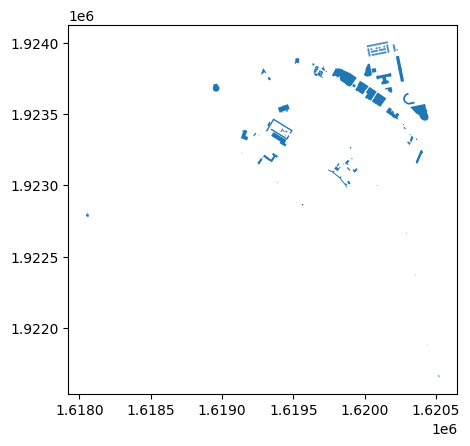

In [15]:
merge_parameters.plot()

In [16]:
# Rasterize the parameters using the resolution defined in the config file using make_geocube and collect into an xarray Dataset
# By default 'all_touched' is set to true, so the parameter value for all buildings that touch a given cell are summed
# A column is also added where every building is given a value of one meaning that the output raster is the number of buildings that
# touch a given cell
rasterize_parameters = nodes.rasterize_parameters(merge_parameters)

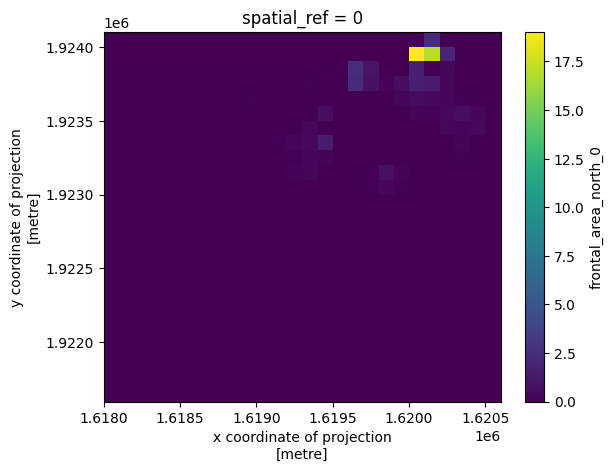

In [17]:
rasterize_parameters['frontal_area_north_0'].plot()

In [18]:
# The raster for each parameter is divided by the building count raster, giving the average parameter value per cell
# Each raster is turned into a numpy array and those arrays are stacked and then converted to a binary format
aggregate_rasters = nodes.aggregate_rasters(rasterize_parameters)
raster_to_numpy = nodes.raster_to_numpy(aggregate_rasters)
numpy_to_binary = nodes.numpy_to_binary(raster_to_numpy)

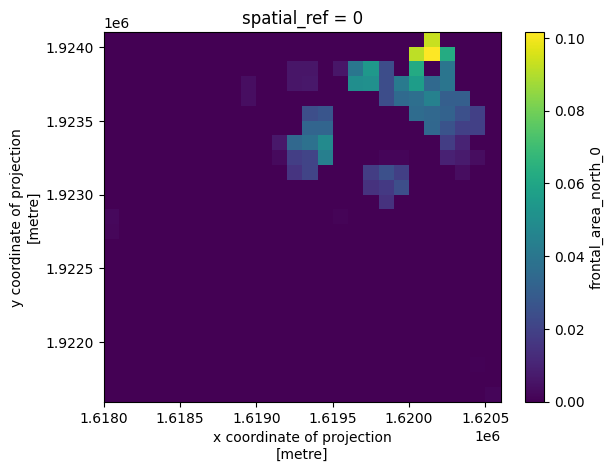

In [19]:
aggregate_rasters['frontal_area_north_0'].plot()

In [20]:
# Write the binary stream to a file as well as its associated index file
nodes.write_binary(numpy_to_binary, raster_to_numpy)
nodes.write_index(raster_to_numpy, building_geometry, target_crs)